<a href="https://colab.research.google.com/github/jain777/Technical-Indicators-FA-Project/blob/main/Using_EMA_30_50_100_%2B_RSI_%2B_MFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
!pip install pandas_ta

In [148]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
yf.pdr_override()

In [227]:
stocksymbols = ['KOTAKBANK.NS']
startdate = date(2015,1,1)
end_date = date(2019,12,31)
print(end_date)
def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
    data = web.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end )
    return data

2019-12-31


In [228]:
df = getMyPortfolio(stocksymbols)


[*********************100%***********************]  1 of 1 completed


In [229]:
CustomStrategy = ta.Strategy(
    name="Defining Various TI to be used",
    description="MFI,RSI & EMA 30,50,100",
    ta=[
        {"kind": "mfi",}, #volume
        {"kind": "rsi"}, #momentum
        {"kind": "ema", "length": 14}, #trend
        {"kind": "ema", "length": 50}, #trend
        {"kind": "ema", "length": 100}, #trend
    ]
)
df.ta.strategy(CustomStrategy)

In [230]:
df.rename(columns = {'EMA_14':'Short', 'EMA_50':'Middle', 'EMA_100':'Long'}, inplace = True)

In [231]:
df.tail(200)

,Open,High,Low,Close,Adj Close,Volume,MFI_14,RSI_14,Short,Middle,Long
Date,,,,,,,,,,,
2019-03-01,1221.699951,1230.500000,1217.349976,1225.949951,1224.681274,2162834,7.041826,40.121540,1249.613685,1248.209347,1235.877598
2019-03-05,1223.900024,1246.300049,1217.800049,1240.449951,1239.166260,3128451,6.899010,45.551142,1248.391854,1247.905057,1235.968139
2019-03-06,1242.099976,1247.000000,1236.599976,1241.300049,1240.015503,2306834,8.710797,45.861092,1247.446280,1247.646037,1236.073722
2019-03-07,1244.000000,1246.000000,1235.199951,1237.199951,1235.919678,1434561,8.792024,44.544039,1246.080103,1247.236387,1236.096023
2019-03-08,1237.000000,1243.500000,1231.699951,1238.900024,1237.618042,1051433,8.865546,45.246192,1245.122759,1246.909471,1236.151548
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,1699.000000,1711.199951,1695.099976,1704.900024,1704.053833,1745488,74.951584,60.769993,1688.668472,1631.915945,1581.597356
2019-12-24,1704.949951,1716.500000,1700.000000,1711.550049,1710.700562,1702704,74.356858,62.075162,1691.719349,1635.038851,1584.170677
2019-12-26,1711.050049,1715.000000,1689.699951,1694.250000,1693.409058,1646970,69.086722,56.782529,1692.056769,1637.360856,1586.350466


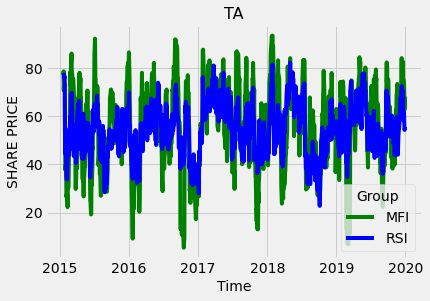

In [232]:
plt.plot(df['MFI_14'], label='MFI', color='green')
plt.plot(df['RSI_14'], label='RSI', color='blue')

#add legend
plt.legend(title='Group')

#add axes labels and a title
plt.ylabel('SHARE PRICE', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('TA', fontsize=16)

#display plot
plt.show()

In [233]:
def buy_sell_function(data):
  buysig = []
  buyprice = []
  flag_long = False
  flag_short = False
  for i in range(0,len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Middle'][i] > data['Short'][i] and flag_long == False and flag_short == False:
        buysig.append(1)
        buyprice.append(data['Close'][i])
        flag_short = True
    elif data['Middle'][i] > data['Long'][i] and data['Middle'][i] < data['Short'][i] and flag_short == False and flag_long == False:
        buysig.append(1)
        buyprice.append(data['Close'][i])
        flag_long = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
        buyprice.append(data['Close'][i])
        buysig.append(-1)
        flag_short = False
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
        buyprice.append(data['Close'][i])
        buysig.append(-1)
        flag_long = False
    else:
        buysig.append(0)
        buyprice.append(data['Close'][i])
  return (buysig, buyprice)

df['buysignal'] = buy_sell_function(df)[0]
df['buyprice'] =buy_sell_function(df)[1]

In [234]:
mfi=df['MFI_14']
rsi=df['RSI_14']
mfisig=[]
for i in range(len(mfi)):
  if mfi[i]>80:
    mfisig.append(-1)
  elif mfi[i]<20:
    mfisig.append(1)
  else:
    mfisig.append(0)

In [235]:
rsi=df['RSI_14']
rsisig=[]
for i in range(len(rsi)):
  if rsi[i]>70:
    rsisig.append(-1)
  elif rsi[i]<30:
    rsisig.append(1)
  else:
    rsisig.append(0)

In [236]:
bs=df['buysignal']
ss=df['buyprice']
ct=0
for i in range(len(bs)):
  if(bs[i]==1 and mfisig[i]==1):
    ct+=1
print(ct)

1


In [237]:
tp=0
fl=0
bp=0
for i in range(len(bs)):
  val=bs[i]*50 + mfisig[i]*50 + rsisig[i]*50
  if val>=50 and fl==0:
    tp-=ss[i]
    fl=1
    bp=ss[i]
    print('Buy :'+ str(ss[i]))
  elif val<=-50 and fl==1:
    tp+=ss[i]
    fl=0
    print('Sell :'+ str(ss[i]))    

if(fl==1):
    tp+=bp

print(tp)

Buy :699.6500244140625
Sell :667.2999877929688
Buy :644.8499755859375
Sell :714.4249877929688
Buy :627.25
Sell :687.6500244140625
Buy :686.5999755859375
Sell :701.3499755859375
Buy :667.4000244140625
Sell :671.5
Buy :700.8499755859375
Sell :726.75
Buy :772.5999755859375
Sell :769.5999755859375
Buy :727.7999877929688
Sell :795.2000122070312
Buy :784.2999877929688
Sell :810.9500122070312
Buy :1009.75
Sell :1005.1500244140625
Buy :1038.3499755859375
Sell :1060.550048828125
Buy :1096.550048828125
Sell :1172.0999755859375
Buy :1148.699951171875
Sell :1233.949951171875
Buy :1256.5
Sell :1325.1500244140625
480.47509765625
